In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Reading corpus the text file
with open("dataset1.txt", 'r', encoding='utf-8') as myfile:
    mytext = myfile.read()

In [2]:
# Tokenizing the dataset
mytokenizer = Tokenizer()
mytokenizer.fit_on_texts([mytext])
total_words = len(mytokenizer.word_index) + 1

In [3]:
# Generating n-gram sequences
my_input_sequences = []
for line in mytext.split('\n'):
    token_list = mytokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        my_input_sequences.append(my_n_gram_sequence)

In [4]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [5]:
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   1, 184],
      dtype=int32)

In [6]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [7]:
X[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 6, 1], dtype=int32)

In [8]:
y

array([  1, 184, 517, ...,   6,   1, 193], dtype=int32)

In [9]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [10]:
y[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
# Defining architecture for LSTM
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))

/home/yashc/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-04-15 08:35:59.306656: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-15 08:35:59.307976: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [12]:
# Training the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - accuracy: 0.0360 - loss: 6.5921
Epoch 2/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 24s 97ms/step - accuracy: 0.0516 - loss: 5.9295
Epoch 3/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 26s 108ms/step - accuracy: 0.0664 - loss: 5.7228
Epoch 4/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 30s 121ms/step - accuracy: 0.0754 - loss: 5.5192
Epoch 5/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 34s 140ms/step - accuracy: 0.0928 - loss: 5.2610
Epoch 6/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 45s 187ms/step - accuracy: 0.1208 - loss: 4.9858
Epoch 7/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 45s 184ms/step - accuracy: 0.1638 - loss: 4.6327
Epoch 8/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 45s 184ms/step - accuracy: 0.1930 - loss: 4.3389
Epoch 9/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - accuracy: 0.2069 - loss: 4.1111
Epoch 10/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 45s 186ms/step - accuracy: 0.2420 - loss: 3.8306
Epoch 11/100
243/243 ━━━━━━━━━━━━━━━━━━━━ 45s 185ms/step - accuracy: 0.2753 - loss: 3.5809
Epoch 12/1

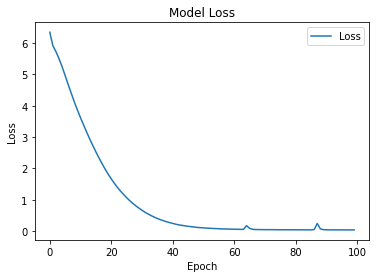

In [13]:
# Plotting loss vs epoch
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

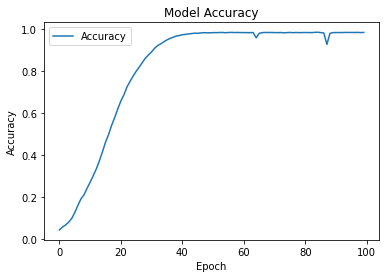

In [14]:
# Plotting accuracy vs epoch
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# Testing the model
input_text = "rnn is the"
predict_next_words= 6

for _ in range(predict_next_words):
    token_list = mytokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in mytokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[14, 9, 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[14, 9, 1, 255]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[14, 9, 1, 255, 3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[14, 9, 1, 255, 3, 5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[14, 9, 1, 255, 3, 5, 100]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[14, 9, 1, 255, 3, 5, 100, 331]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
rnn is the concept of a recurrent neuron is
